In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
# For nice plots, set LaTeX rendering
plt.rc('text', usetex=True)
plt.rc('font', family='sans-serif')

# Use tab10 color cycle
color_cycle = ['#5778a4', '#e49444', '#d1615d', '#85b6b2', '#6a9f58', '#e7ca60', '#a87c9f', '#f1a2a9', '#967662', '#b8b0ac']
plt.rc('axes', prop_cycle=plt.cycler('color', color_cycle))

In [3]:
#Load data
results = pd.read_csv('gates_convergence_results.csv')
# Print max N for each gate
print(results.groupby('gate').max('N').N)
print(results.groupby('gate').count().N)

gate
COPY     672335
RED     1000000
SUM     1000000
UNQ     1000000
Name: N, dtype: int64
gate
COPY    315
RED     324
SUM     324
UNQ     324
Name: N, dtype: int64


In [4]:
# Set convergence values from the Monte Carlo simulations
convergence_values_for_gates = {
    'RED': dict(
        red=6.643767,
        unq1=0.000017,
        unq2=0.000017,
        syn=0.000019,
        I=6.643820,
    ),
    'UNQ': dict(
        red=5.524592,
        unq1=1.119337,
        unq2=-5.524592,
        syn=5.524592,
        I=6.643928,
    ),
    'SUM' : dict(
        red=0.353351,
        unq1=0.146613,
        unq2=0.146613,
        syn=6.497315,
        I=7.143892,
    ),
    'COPY': dict(
        red=6.644,
        unq1=-6.67947e-05,
        unq2=-6.67947e-05,
        syn=6.64392,
        I=13.287857,
    ),
}

In [5]:
def plot_pid(results, gate, ax=None):

    if ax is None:
        _, ax = plt.subplots(figsize=(8, 4), dpi=100)

    if gate in convergence_values_for_gates:
        convergence_values = convergence_values_for_gates[gate]
    else:
        convergence_values = {
            'red': None,
            'unq1': None,
            'unq2': None,
            'syn': None,
            'I': None
        }

    ax.set_title(f"'{gate.lower()}' gate")
    ax.set_xscale('log')
    ax.set_xlim(4, 1e6)

    results_gate = results[results.gate == gate].drop(columns=['gate'])
    results_gate['I'] = results_gate.red + results_gate.unq1 + results_gate.unq2 + results_gate.syn


    plot_mean_and_interval(results_gate, ax, x='N', y='red', label='$\Pi_\mathrm{red}$', convergence_value=convergence_values['red'])
    plot_mean_and_interval(results_gate, ax, x='N', y='unq1', label='$\Pi_\mathrm{unq, 1}$', convergence_value=convergence_values['unq1'])
    plot_mean_and_interval(results_gate, ax, x='N', y='unq2', label='$\Pi_\mathrm{unq, 2}$', convergence_value=convergence_values['unq2'])
    plot_mean_and_interval(results_gate, ax, x='N', y='syn', label='$\Pi_\mathrm{syn}$', convergence_value=convergence_values['syn'])
    plot_mean_and_interval(results_gate, ax, x='N', y='I', c='k', ls='--', label='$I(T:\mathbf{S})$', convergence_value=convergence_values['I'])
    

def plot_mean_and_interval(df, ax, x, y='c', zorder_shift=1, convergence_value=None, **kwargs):
    
    sns.lineplot(data=df , x=x, y=y, ax=ax, zorder=1+zorder_shift, **kwargs)
    
    if convergence_value is not None:
        # Show what the values converge to as markers on the right
        # Get color of last line
        line = ax.lines[-1:]
        line = ax.plot([ax.get_xlim()[1] * 2, ax.get_xlim()[1] * 1.6], [convergence_value]*2, zorder=1+zorder_shift, color=line[-1].get_color(), linewidth=1)
        line[0].set_clip_on(False)

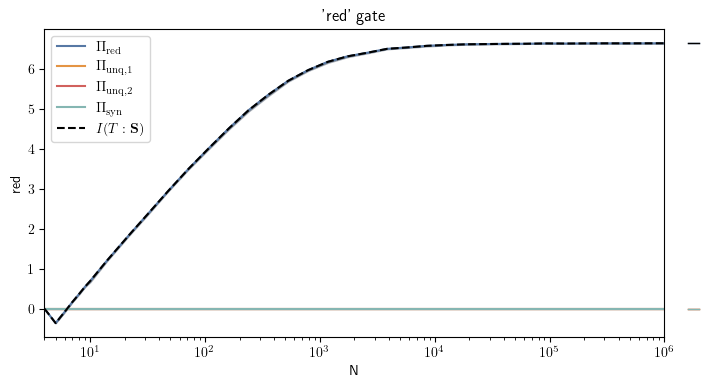

In [6]:
#Redundancy Gate
plot_pid(results, 'RED')

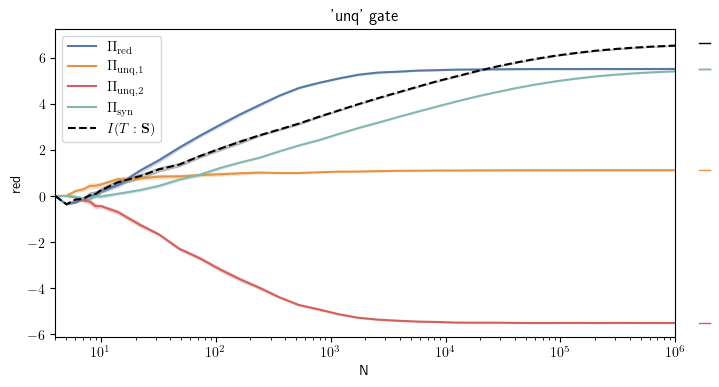

In [7]:
# Unique Gate
plot_pid(results, 'UNQ')

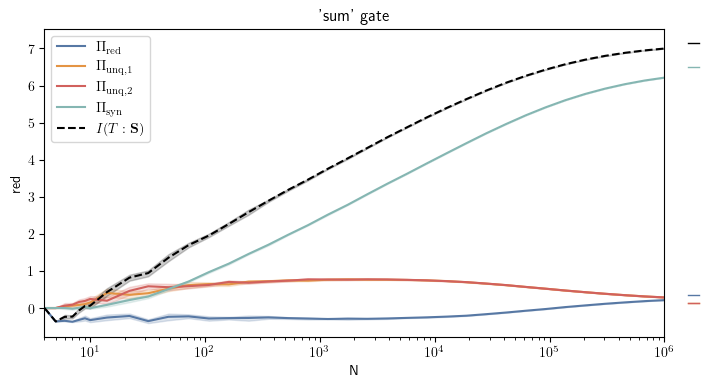

In [8]:
# Sum gate
plot_pid(results, 'SUM')

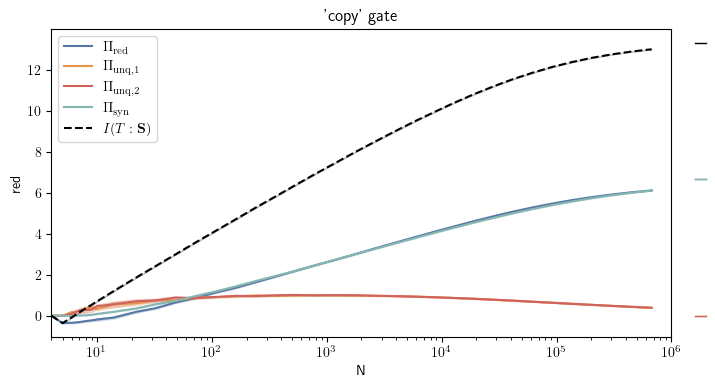

In [9]:
# Copy gate
plot_pid(results, 'COPY')

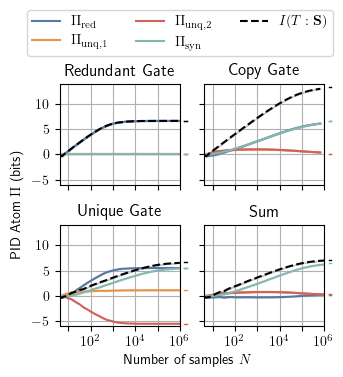

In [10]:
# Plot all gates together
cm = 1/2.54  # centimeters in inches
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8.67*cm, 8*cm))

gates = ['RED', 'COPY', 'UNQ', 'SUM']
for ax, gate in zip(axes.flatten(), gates):
    ax.grid()
    plot_pid(results, gate, ax=ax)

# Hide all other legends and axis labels
for ax in axes.flatten():
    ax.get_legend().remove()
    ax.set_xlabel(None)
    ax.set_ylabel(None)

# Add legend to the right
# axes[0, 1].legend(loc='center left', bbox_to_anchor=(1.1, -0.2))

# Add two-column legend to the top
axes[0, 1].legend(loc='upper center', bbox_to_anchor=(-.2, 1.8), ncol=3)

axes[0, 0].set_xticks(10**np.arange(1, 7))
axes[0, 0].set_xticklabels([f'$10^{i}$' if i % 2 == 0 else '' for i in range(1, 7)])

axes[0, 0].set_ylim(-6, 14)
axes[0, 0].set_yticks([-5, 0, 5, 10])

axes[0, 0].set_title("Redundant Gate")
axes[0, 1].set_title("Copy Gate")
axes[1, 0].set_title("Unique Gate")
axes[1, 1].set_title("Sum")
# Set gap between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

# Set joint axis labels
fig.text(0.5, 0, 'Number of samples $N$', ha='center', va='center')
fig.text(0, 0.5, 'PID Atom $\Pi$ (bits)', ha='center', va='center', rotation='vertical');

In [11]:
fig.savefig('demo_gates_convergence.pdf', bbox_inches='tight')